<a href="https://colab.research.google.com/github/shail-git/ML-Notes-in-Markdown/blob/master/RLintrobook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# chap 2 - K-arm bandit problem

## base

In [46]:
import numpy as np
import random
import matplotlib.pyplot as plt


In [47]:
nArms = 10                  # n number of bandits
iterations = 200         # number of repeated iterations
plays = 1000                # number of pplays per iteration
mean, stDev = 0, 1

qtable = np.zeros(nArms)
kAction = np.zeros(nArms)
# rSum = np.zeros(nArms)
qstar = np.full(nArms,5)   
optim = 0                  

# Array to store the scores, number of plays X number of agents
scoreArr = np.zeros((plays, 1))
# Array to maintain optimal count, Graph 2
optimlArr = np.zeros((plays, 1))



In [48]:
def choose_action(epsilon=0.01):
  global qtable
  randProb = np.random.random()   # Pick random probability between 0-1
  if randProb < epsilon:
      a = np.random.choice(len(qtable))    # Select random action

  # Greedy Method
  else:
      maxAction = np.argmax(qtable)     # Find max value estimate
      # identify the corresponding action, as array containing only actions with max
      action = np.where(qtable == np.argmax(qtable))[0]
      # If multiple actions contain the same value, randomly select an action
      if len(action) == 0:
          a = maxAction
      else:
          a = np.random.choice(action)
  # save last action in variable, and return result
  return a

In [49]:
def agentstateupdate(reward, At):
  global kAction, rSum, qtable, timeStep
  # At => value of choosen action
  kAction[At] += 1       # Add 1 to action selection
  # rSum[At] += reward     # Add reward to sum array

  # Calculate new action-value, sum(r)/ka
  # qtable[At] = rSum[At]/kAction[At]
  qtable[At] = qtable[At]+(reward-qtable[At])/kAction[At]

  # Increase time step
  timeStep += 1

In [50]:
def reset():
  global mean, stDev, nArms, qstar, optim, timeStep, kAction, rSum, qtable
  timeStep = 0                    # Time Step t
  lastAction = None               # Store last action

  kAction[:] = 0                  # count of actions taken at time t
  # rSum[:] = 0
  qtable[:] = 0                   # action value estimates Qt ~= Q*(a)
  # Set random gaussian/normal values using numpy function, requires mean, standard deviation and number of arms
  qstar = np.random.normal(mean, stDev, nArms)

  # Identify the maximum value in action array
  optim = np.argmax(qstar)

In [51]:
# loop for number of iterations
for iIter in range(iterations):

    # Print statement after every 100 iterations
    if (iIter%100) == 0:
        print("Completed Iterations: ",iIter)

    #Reset testbed and all agents
    reset()

    # Loop for number of plays
    for jPlays in range(plays):

        actionT =  choose_action()

        # Reward - normal dist (Q*(at), variance = 1)
        rewardT = np.random.normal(qstar[actionT], scale=1)

        # Agent checks state
        agentstateupdate(rewardT, actionT)

        # Add score in arrary, graph 1
        scoreArr[jPlays] += rewardT

        # check the optimal action, add optimal to array, graph 2
        if actionT == optim:
            optimlArr[jPlays] += 1

Completed Iterations:  0
Completed Iterations:  100


Running...


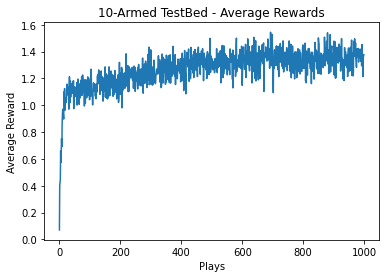

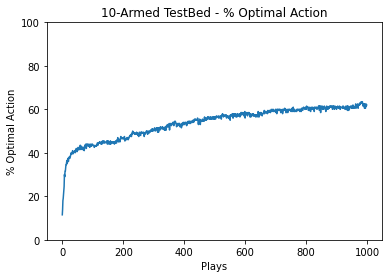

In [52]:
print("Running...")
scoreAvg = scoreArr/iterations
optimlAvg = optimlArr/iterations

#Graph 1 - Averate rewards over all plays
plt.title("10-Armed TestBed - Average Rewards")
plt.plot(scoreAvg)
plt.ylabel('Average Reward')
plt.xlabel('Plays')
plt.show()

#Graph 1 - optimal selections over all plays
plt.title("10-Armed TestBed - % Optimal Action")
plt.plot(optimlAvg * 100)
plt.ylim(0, 100)
plt.ylabel('% Optimal Action')
plt.xlabel('Plays')
plt.show()

# chap- 3 marcov desision process





